In [2]:
# %load statistics.py
"""
A simple statistical analysis of the simulation
caculates average time as well as success precentage
"""

from __future__ import division
import math
import matplotlib.pyplot as plt
import numpy as np
import json
__authors__ = 'Noam Benelli'



def search_efficiency(dict_list):
    #calculate the ratio of time in which odor was detected/all of the flight time
    search_efficincy_list = []
    for j in range(len(dict_list)): #itirate through navigators
        
        diff_dict = dict_list[j]
        num_it = len(diff_dict)
        Last_dt_odor = False
        T_odor = 0
        T_no_odor = 0

        diff_list = diff_dict["diff_list{0}".format(0)]
        if diff_list[-1][-1]:
            for i in range(len(diff_list)): #itirate within list 
                odor = diff_list[i][3] #odor found or odor lost
                if odor == None and Last_dt_odor :
                    T_odor += 1
                elif odor =='odor found':
                    T_odor += 1
                    Last_dt_odor = True
                elif odor == 'odor lost':
                    Last_dt_odor = False

            search_eff = 1 - T_odor/len(diff_dict["diff_list{0}".format(0)])
            #print search_eff
            search_efficincy_list.append(search_eff)
    average = math.fsum(search_efficincy_list) / len(search_efficincy_list)
    return average

def average_time(dict_list):
    #calculate the average time of flight for successful flights
    times_list = []
    for diff_dict in dict_list:
        diff_list = diff_dict["diff_list{0}".format(0)]
        if diff_list[-1][-1]:
            finishing_time = diff_list[-1][2]
            times_list.append(finishing_time)

    #print times_list
    if len(times_list) != 0:
        average = math.fsum(times_list) / float(len(times_list))
    else:
        average = 0
    return average

def succuss_precentage(dict_list):
    winners = 0.
    for diff_dict in dict_list:
        diff_list = diff_dict["diff_list{0}".format(0)]
        #print diff_list[-1]
        if diff_list[-1][-1]:
            winners += 1
    
    succuss_precentage = winners / len(dict_list)       
    return succuss_precentage


#main function
def calc_stats(diff_dict):

    succ_prec = succuss_precentage(diff_dict)

    average_time_ = average_time(diff_dict)
    
    average_efficiency = search_efficiency(diff_dict)

    return [succ_prec ,average_time_,average_efficiency]

In [2]:
# if __name__ == "__main__":
with open('data0.json') as data_file1:  
    dict_list1 = json.load(data_file1)
data1 = calc_stats(dict_list1)
with open('data1.json') as data_file2:  
    dict_list2 = json.load(data_file2)
data2 = calc_stats(dict_list2)    
with open('data2.json') as data_file3:  
    dict_list3 = json.load(data_file3)
data3 = calc_stats(dict_list3)

tot_stats = [data1,data2,data3]

In [3]:
%matplotlib inline
####################################################################
#one graph to show all of the data
fig = plt.figure()
ax = fig.add_subplot(111)

n_groups = 3
bar_width = 0.5
opacity = 0.4
index = np.arange(0, 2*n_groups, 2)

chart = plt.bar(index, data1, bar_width, color='blue', edgecolor='black')
chart = plt.bar(index+bar_width, data2, bar_width, color='red', edgecolor='black')
chart = plt.bar(index+2*bar_width, data3, bar_width, color='green', edgecolor='black')

ax.set_xlabel('Performance (%)')
ax.set_title('Overall comparison')

plt.xticks(index+bar_width*1.5, ('Success %', 'AVG Time', 'AVG Efficiency'))
plt.legend()
plt.tight_layout()

#plt.show()
############################################################################

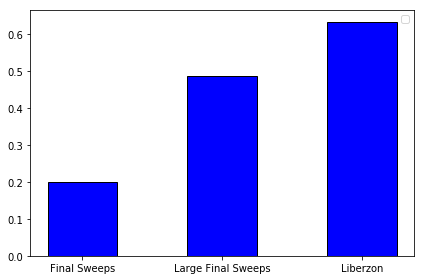

In [4]:
############################################################################
#three seperate graphs
plt.figure()
ax = fig.add_subplot(111)
(succ_prec ,average_time_,average_efficienc) = zip(*tot_stats)

index = np.arange(0, n_groups, 1)

chart = plt.bar(index, succ_prec, bar_width, color='blue', edgecolor='black')
#chart = plt.bar(index+bar_width, succ_prec[1], bar_width, color='red', edgecolor='black')
#chart = plt.bar(index+2*bar_width, succ_prec[2], bar_width, color='green', edgecolor='black')
plt.xticks(index, ('Final Sweeps', 'Large Final Sweeps', 'Liberzon'))
ax.set_title('Success Percentage')
plt.legend()
plt.tight_layout()
plt.show()
    